# Submitted By: SANTOSHI PATNAIK, (DS2306)

# Project 2: Avocado Project

# Project Descrfiption:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold



#### Here the problem statement can be viewed in two different ways such as predicting the "AveragePrice" and "Region"

In [1]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfav=pd.read_csv('avocado.csv')
dfav

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfav.drop('Unnamed: 0',axis=1,inplace=True)
dfav

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfav.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
dfav.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [6]:
dfav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
dfav.shape

(16468, 13)

seems the dataset contains so many null values.

In [8]:
#checking for null values
dfav.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

<AxesSubplot:>

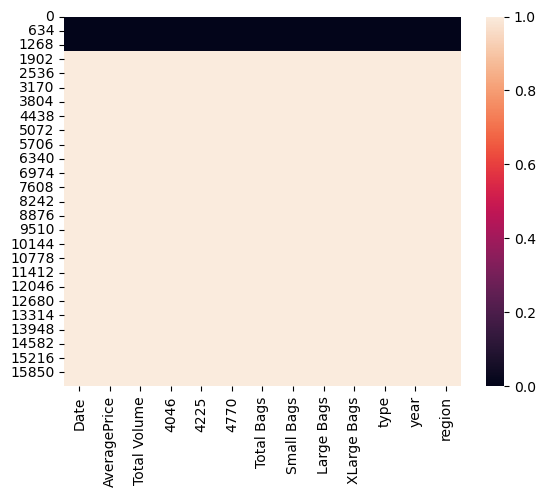

In [9]:
#visualizing null values using heatmap
sns.heatmap(dfav.isnull())

 the data set contains huge number of null values present in it.

In [10]:
dfav.dropna(inplace=True)

In [11]:
dfav

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [12]:
dfav.shape

(1517, 13)

<AxesSubplot:>

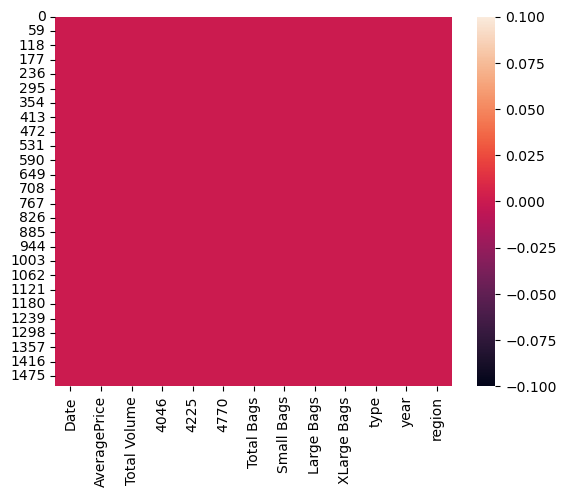

In [13]:
# visualizing heatmap after dropping null values
sns.heatmap(dfav.isnull())

In [14]:
dfav.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [15]:
#numerical columns:
numeric_col=[]
for i in dfav.dtypes.index:
    if dfav.dtypes[i]!="object":
        numeric_col.append(i)
print("numerical column:",numeric_col)        

numerical column: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [16]:
#Categorical Columns:
categorical_col=[]
for i in dfav.dtypes.index:
    if dfav.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)    

categorical columns: ['Date', 'type', 'region']


In [17]:
#Statistical Summery:
dfav.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#observations:
1. in 'Total Volume','4046','4770','Total Bags','Small Bags','Large Bags' columns the mean value is less than median (50%),
   so the data is left skewed or negatively skewed
2.in column '4255', 'XLarge Bags' dat are highly +vely skewed
3. overall if we check we can see most of the columns contains highly skewed date either +ve or -ve
4. difference between 75% and max shows that there are outliers present in some columns in the dataset

# Data Visualization:

### Univariate Analysis:

conventional    1517
Name: type, dtype: int64


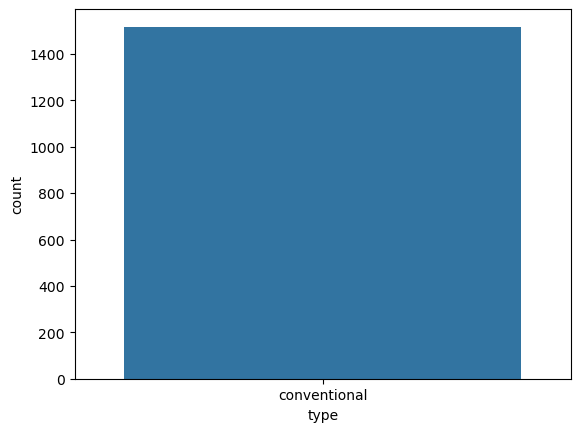

In [18]:
#visualizing the number of unique values in "type" column:   #categorical data
p=sns.countplot(x="type",data=dfav)
print(dfav["type"].value_counts())

from the above graph we can see the data presented here is only of one "type" that is conventional type

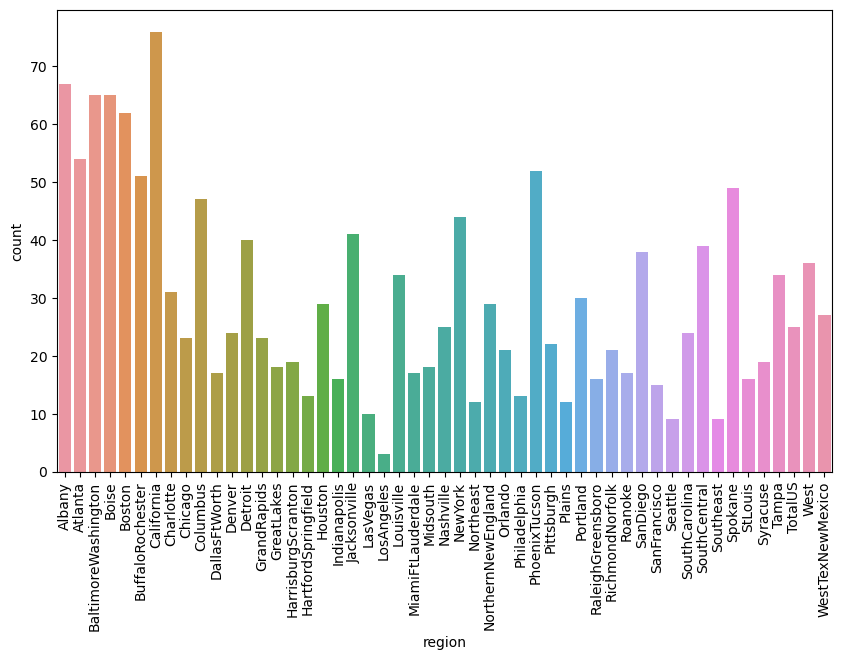

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [19]:
#visualizing the number of unique values in "type" column:   #categorical data
plt.figure(figsize=(10,6))
p=sns.countplot(x="region",data=dfav)
plt.xticks(rotation=90)
plt.show()
print(dfav["region"].value_counts())

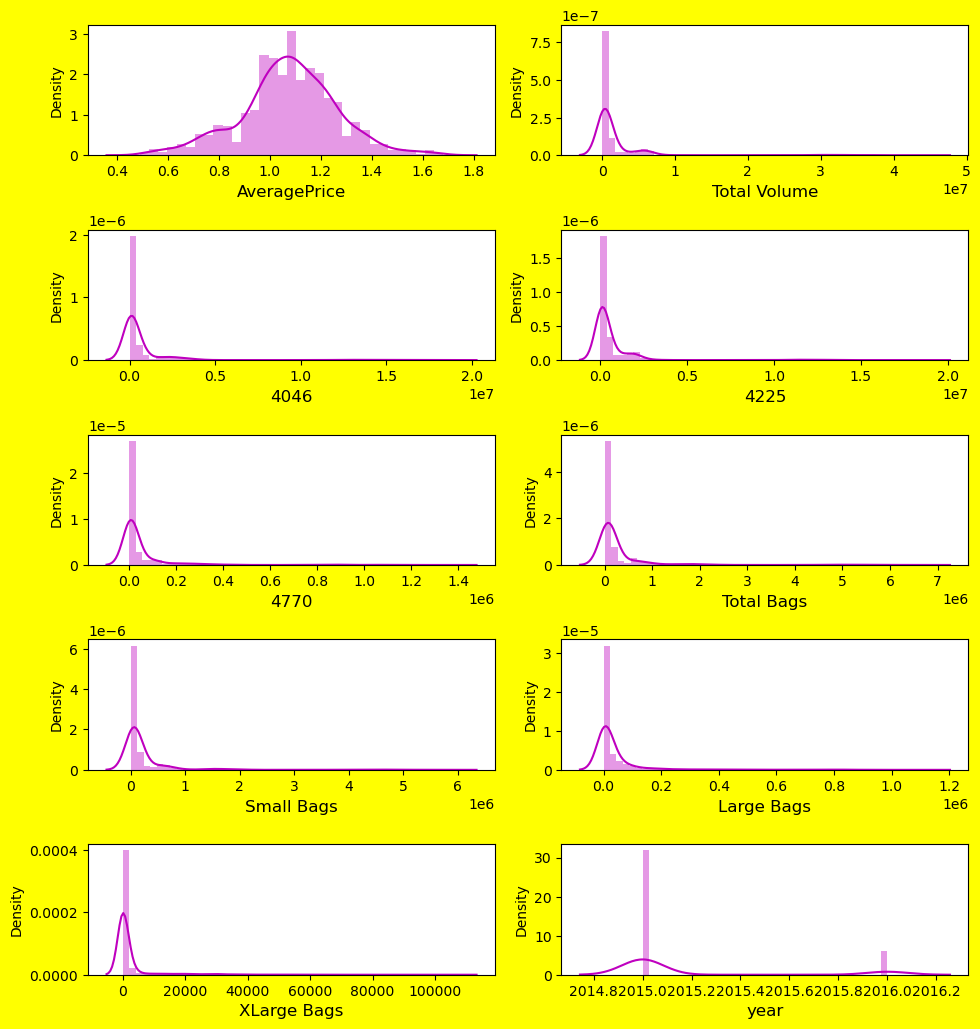

In [20]:
# to check how the data has been distributed in numerical columns:
plt.figure(figsize=(10,12),facecolor="yellow")
plotnum=1
for i in numeric_col:
    if plotnum<=12:
        p=plt.subplot(6,2,plotnum)
        sns.distplot(dfav[i],color="m")
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnum+=1
plt.tight_layout()    


In [21]:
dfav['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

2015.0    1270
2016.0     247
Name: year, dtype: int64


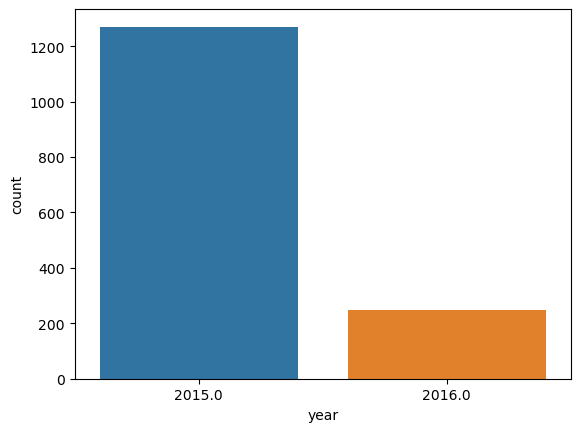

In [22]:
p=sns.countplot(x="year",data=dfav)
print(dfav["year"].value_counts())

In [23]:
dfav.columns.tolist()

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

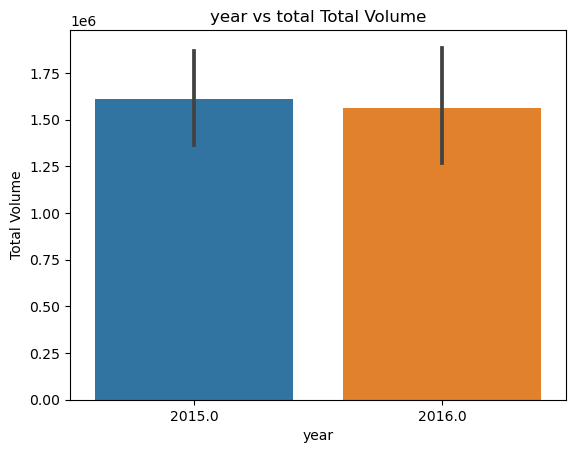

In [24]:
# analysing Total Volume  and year                         # to get insight of total sales in each year
plt.title("year vs total Total Volume")
sns.barplot(x="year",y="Total Volume",data=dfav)
plt.show()


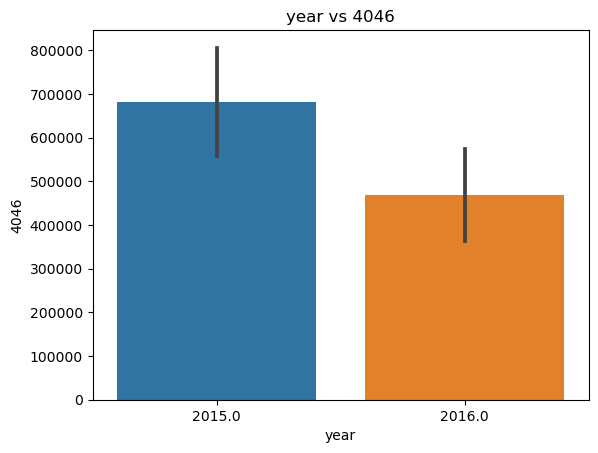

In [25]:
# analysing Total Volume  and year                         # to get insight of 4046 sales in each year
plt.title("year vs 4046")
sns.barplot(x="year",y="4046",data=dfav)
plt.show()


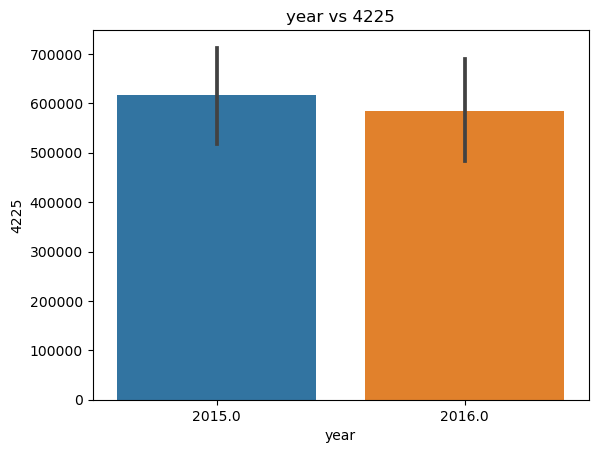

In [26]:
# analysing 4225  and year                         # to get insight of  4225 sales in each year
plt.title("year vs 4225")
sns.barplot(x="year",y="4225",data=dfav)
plt.show()


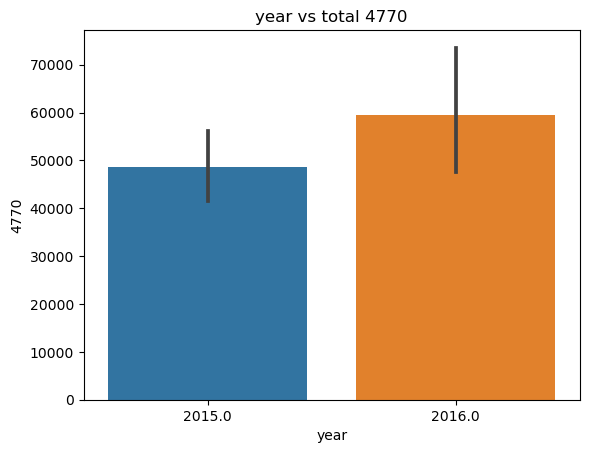

In [27]:
# analysing 4770 and year                         # to get insight of 4770 sales in each year
plt.title("year vs total 4770")
sns.barplot(x="year",y="4770",data=dfav)
plt.show()


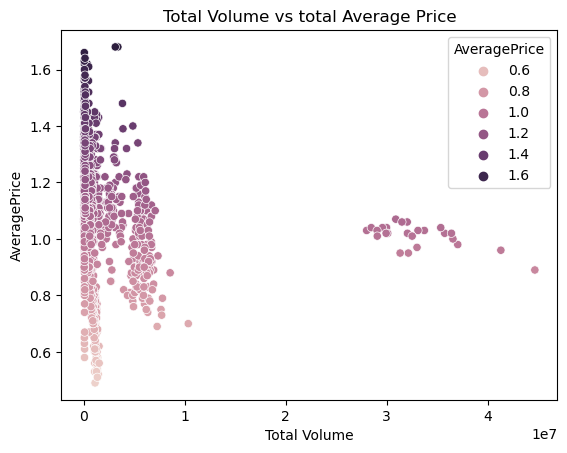

In [28]:
# analysing Total Volume  and Average Price
plt.title("Total Volume vs total Average Price")
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="AveragePrice",data=dfav)
plt.show()


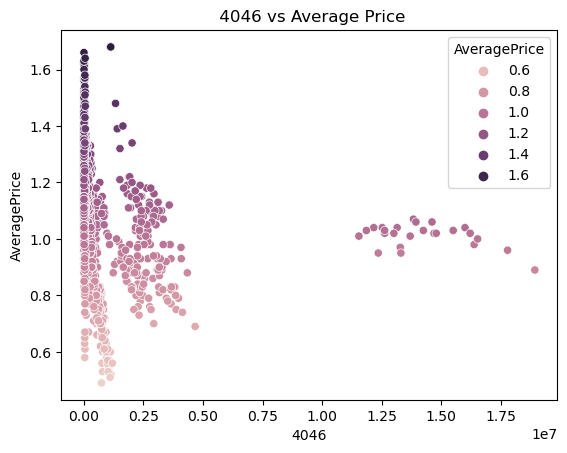

In [29]:
# analysing 4046  and Average Price
plt.title(" 4046 vs Average Price")
sns.scatterplot(x="4046",y="AveragePrice",hue="AveragePrice",data=dfav)
plt.show()


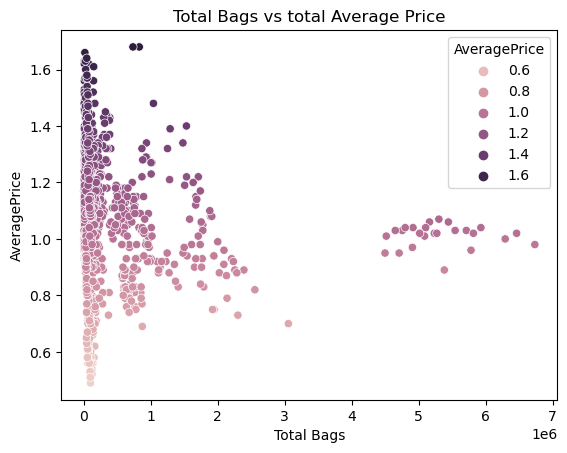

In [30]:
# analysing Total Bags  and Average Price
plt.title("Total Bags vs total Average Price")
sns.scatterplot(x="Total Bags",y="AveragePrice",hue="AveragePrice",data=dfav)
plt.show()


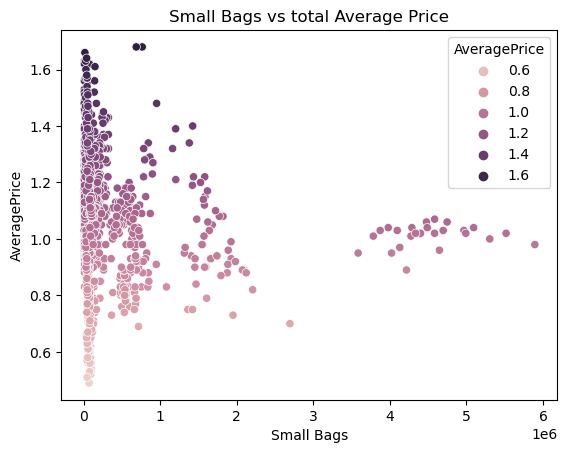

In [31]:
# analysing Small Bags   and Average Price
plt.title("Small Bags vs total Average Price")
sns.scatterplot(x="Small Bags",y="AveragePrice",data=dfav,hue='AveragePrice')
plt.show()


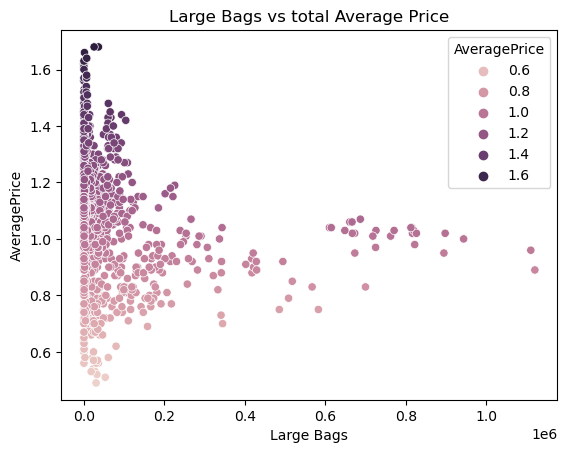

In [32]:
# analysing Large Bags  and Average Price
plt.title("Large Bags vs total Average Price")
sns.scatterplot(x="Large Bags",y="AveragePrice",data=dfav,hue='AveragePrice')
plt.show()


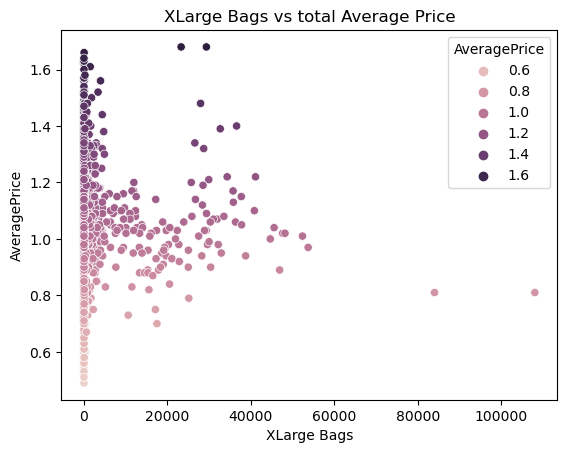

In [33]:
# analysing XLarge Bags  and Average Price
plt.title("XLarge Bags vs total Average Price")
sns.scatterplot(x="XLarge Bags",y="AveragePrice",data=dfav,hue='AveragePrice')
plt.show()


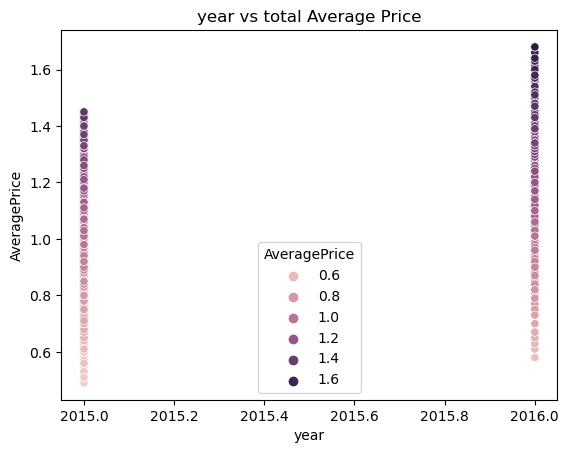

In [34]:
# analysing year  and Average Price
plt.title("year vs total Average Price")
sns.scatterplot(x="year",y="AveragePrice",data=dfav,hue='AveragePrice')
plt.show()


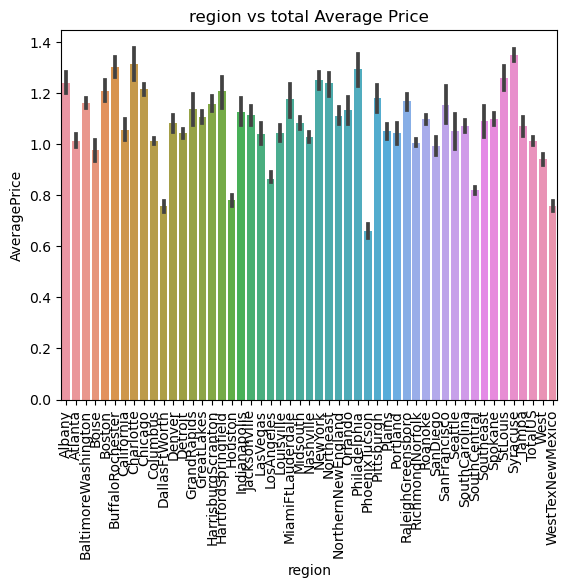

In [35]:
# analysing region  and Average Price
plt.title("region vs total Average Price")
sns.barplot(x="region",y="AveragePrice",data=dfav)
plt.xticks(rotation=90)
plt.show()


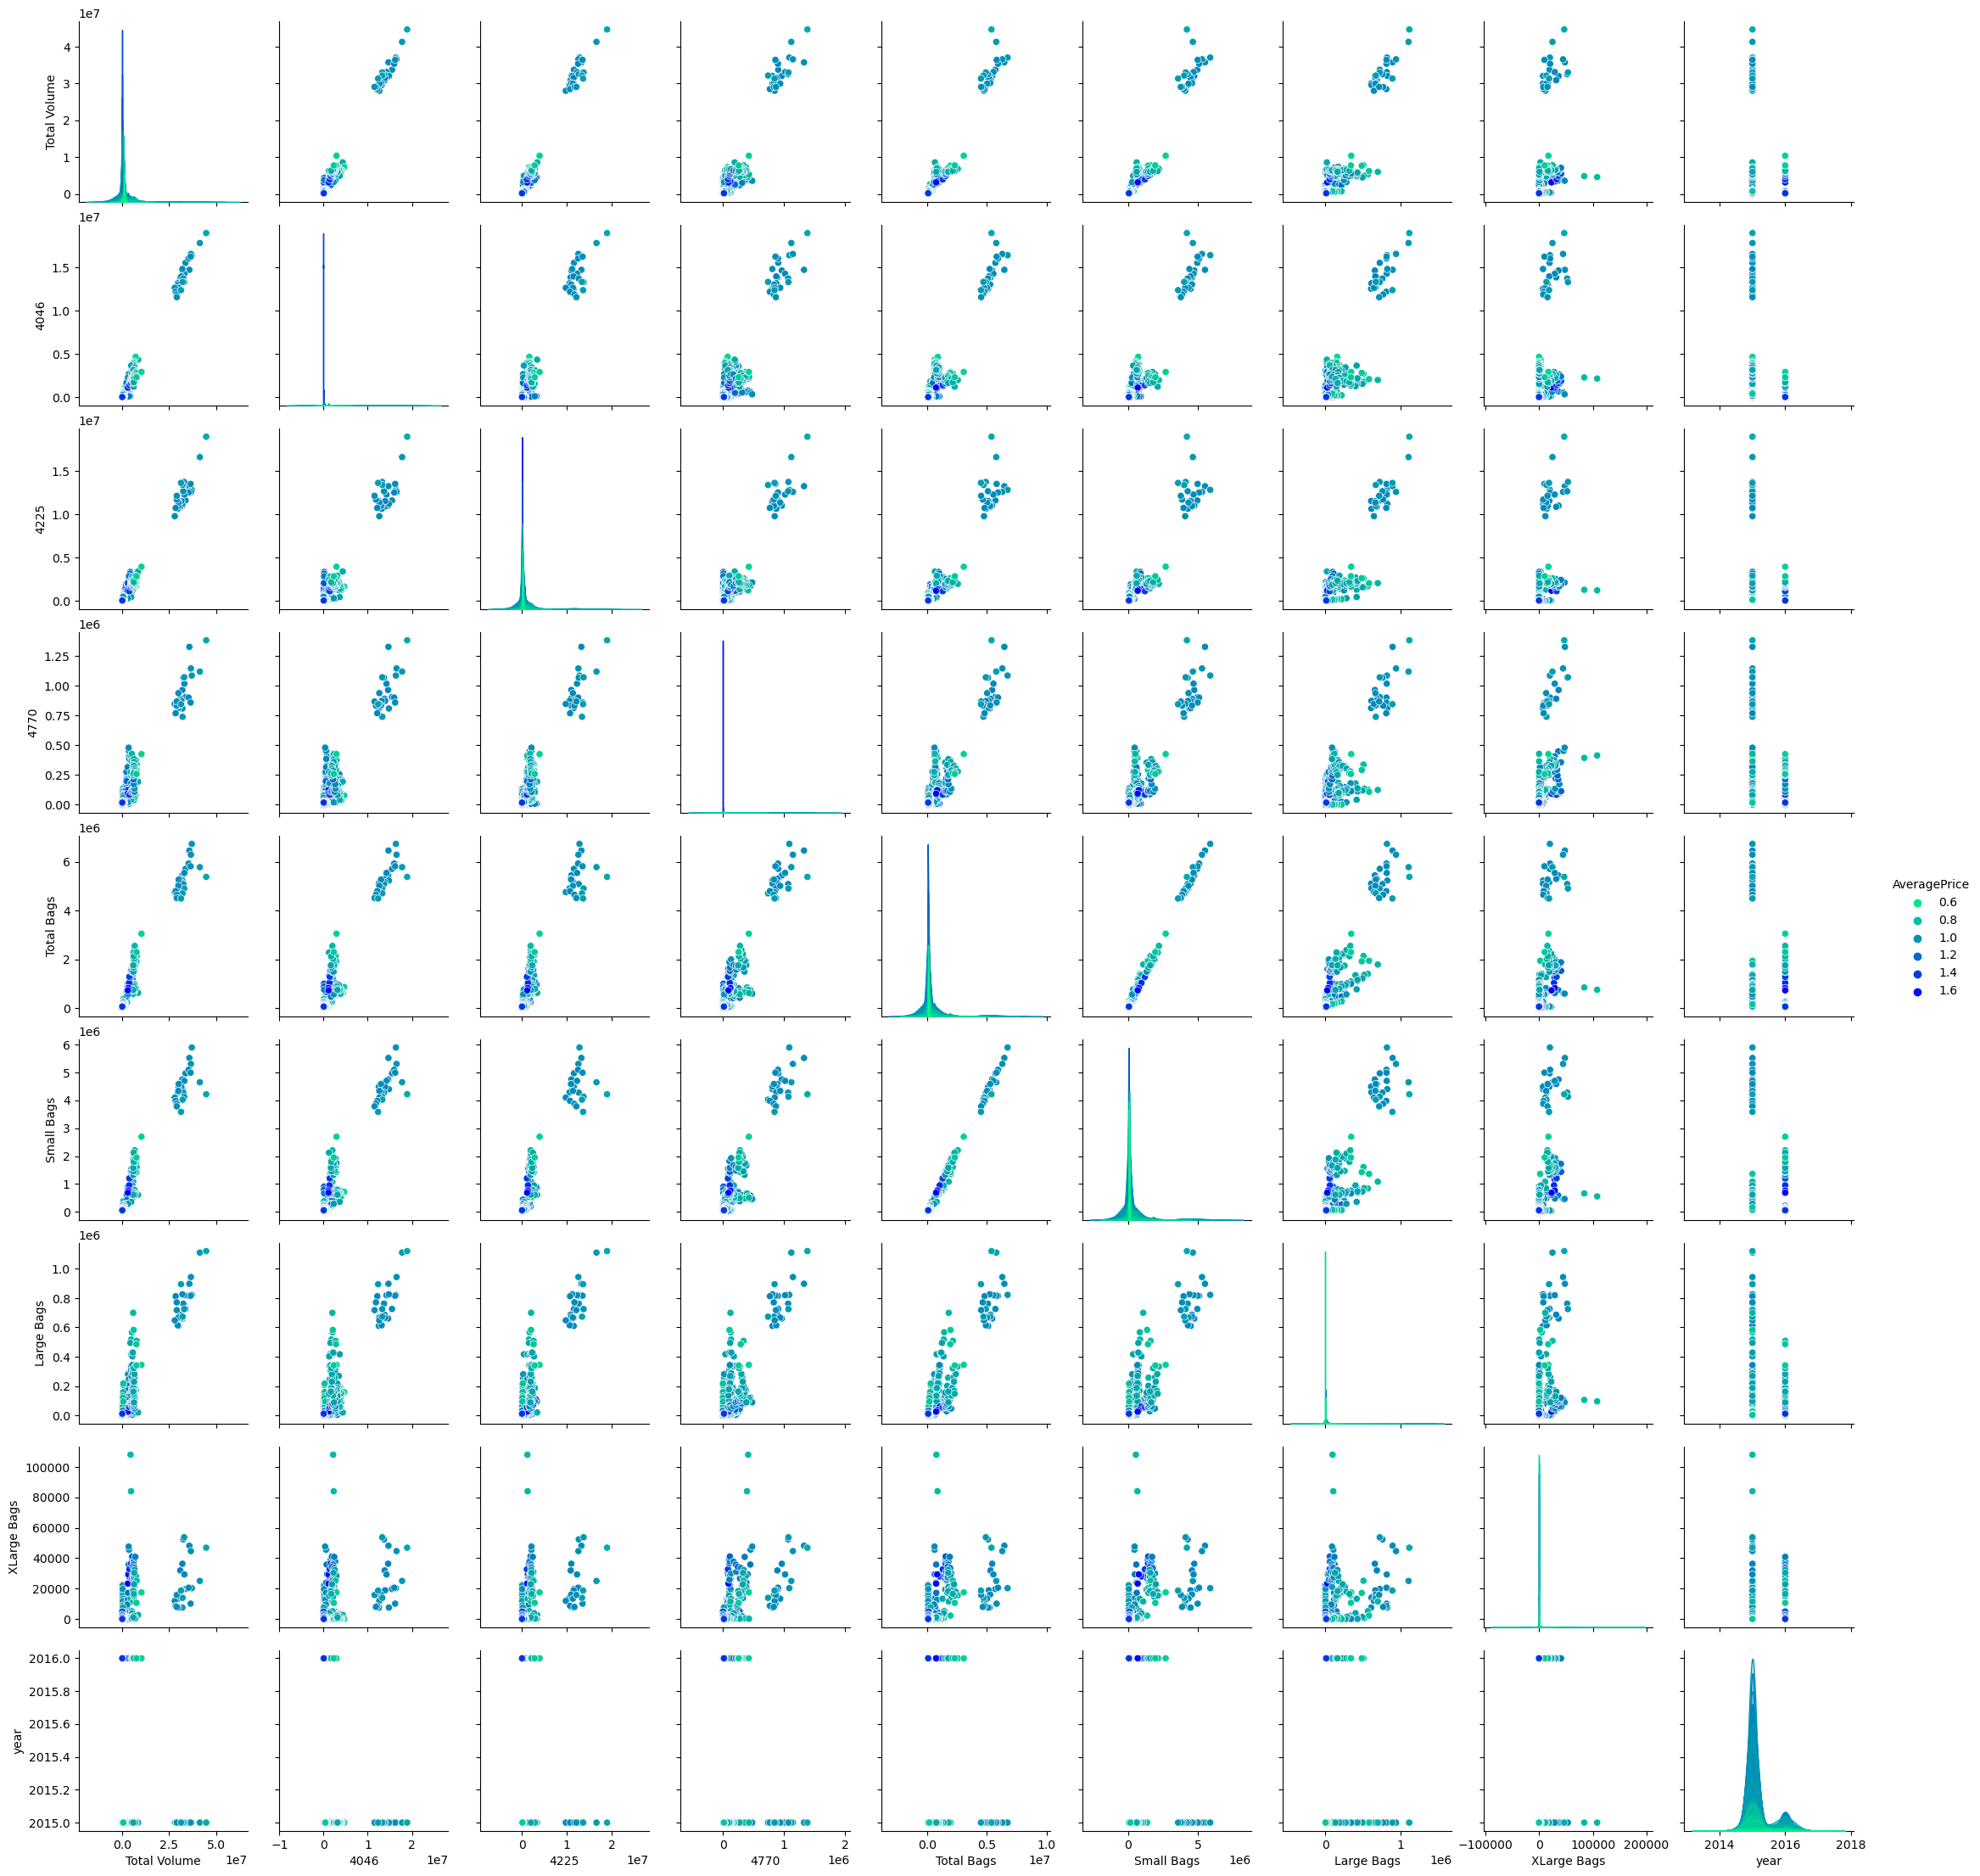

In [36]:
#Multivariate Analysis:
sns.pairplot(dfav,hue='AveragePrice',palette='winter_r')
plt.show()

## Feature Engineering:

In [37]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in dfav.columns:
    if dfav[i].dtypes=="object":
        dfav[i]=OE.fit_transform(dfav[i].values.reshape(-1,1))    
dfav       

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015.0,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015.0,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015.0,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015.0,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53.0,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0.0,2016.0,7.0
1513,29.0,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0.0,2016.0,7.0
1514,5.0,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0.0,2016.0,7.0
1515,83.0,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0.0,2016.0,7.0


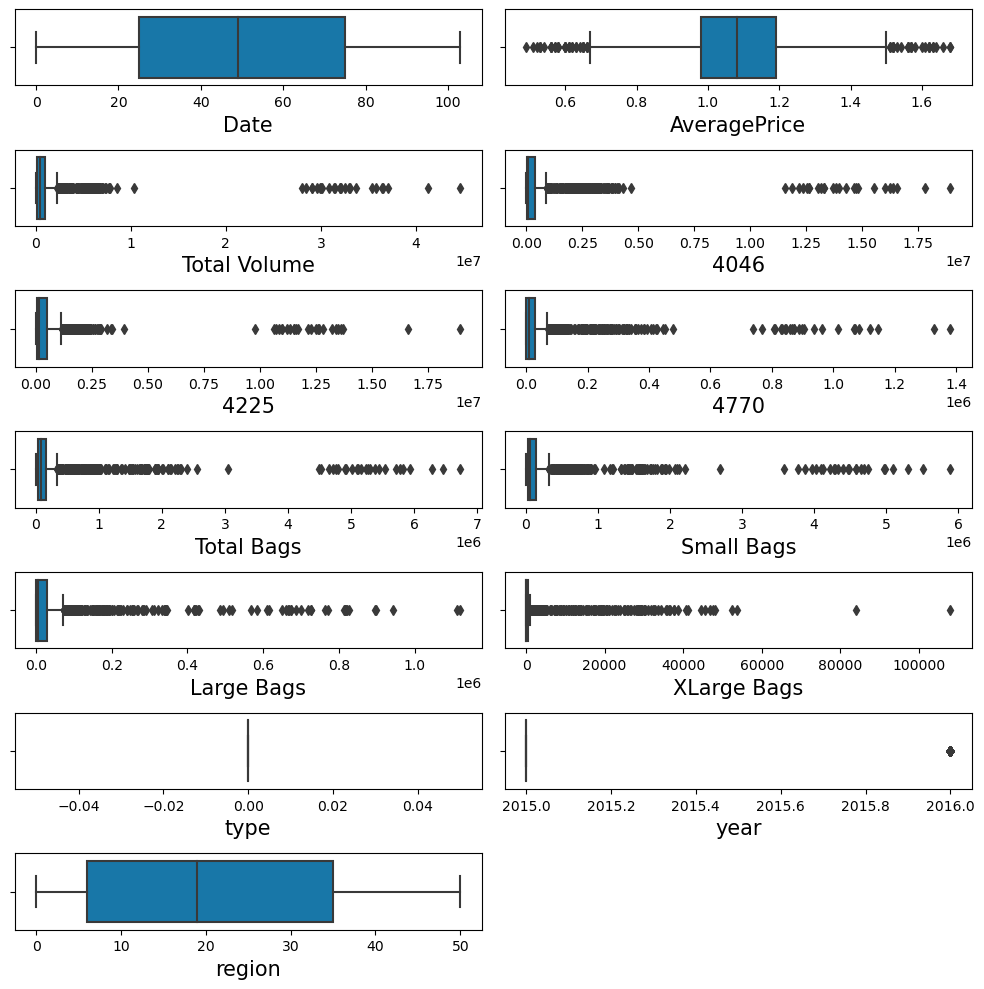

In [38]:
# checking for outliers
plt.figure(figsize=(10,10),facecolor="white")
plotnum=1
for i in dfav.columns:
    if plotnum<=14:
        p=plt.subplot(7,2,plotnum)
        sns.boxplot(dfav[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

In [39]:
dfav.drop(['type','year'],axis=1,inplace=True)    # droping some of columns which contains outliers only
dfav

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,53.0,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7.0
1513,29.0,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7.0
1514,5.0,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7.0
1515,83.0,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7.0


In [40]:
# removing utliers from other columns using Z-Score method
from scipy.stats import zscore
out_features=dfav[['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))
z

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,0.346966,0.331490,0.333053,0.365608,0.371055,0.360044,0.292727
1,0.349078,0.331676,0.338923,0.365534,0.369812,0.360008,0.292727
2,0.334785,0.331614,0.300348,0.365010,0.371922,0.359960,0.292727
3,0.343636,0.331441,0.322576,0.365431,0.375576,0.359701,0.292727
4,0.349944,0.331539,0.339401,0.365408,0.375098,0.359160,0.292727
...,...,...,...,...,...,...,...
1512,0.318397,0.302475,0.331910,0.238672,0.308916,0.273213,0.260489
1513,0.321242,0.309770,0.334407,0.224966,0.299831,0.288090,0.292727
1514,0.321203,0.308209,0.333987,0.244443,0.301950,0.290953,0.182037
1515,0.318784,0.304230,0.333568,0.238936,0.298364,0.290783,0.292727


In [41]:
#threshold=3
np.where(z>3)

(array([ 398,  401,  409,  412,  412, 1016, 1017, 1059, 1182, 1182, 1182,
        1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183, 1184,
        1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185, 1185,
        1185, 1186, 1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187, 1187,
        1187, 1187, 1187, 1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189,
        1189, 1189, 1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190,
        1190, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1194, 1194,
        1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1195, 1195,
        1196, 1196, 1196, 1196, 1196, 1196, 1197, 1197, 1197, 1197, 1197,
        1197, 1198, 1198, 1198, 1198, 1198, 1198, 1198, 1199, 1199, 1199,
        1199, 1199, 1199, 1200, 1200, 1200, 1200, 1200, 1200, 1201, 1201,
        1201, 1201, 1201, 1201, 1202, 1202, 1202, 1202, 1202, 1202, 1202,
        1203, 1203, 1203, 1203, 1203, 

In [42]:
# we have to removethese rows which have outliers:
dfav1=dfav[(z<3).all(axis=1)]
dfav1.shape          # after removing outliers the data frame size

(1439, 11)

In [43]:
dfav.shape                       # original dataframe size

(1517, 11)

In [44]:
#data loss percentage:
print("data loss percentage",((dfav.shape[0]-dfav1.shape[0])/dfav.shape[0])*100)

data loss percentage 5.1417270929466055


the data loss percentage in z-score method is 5.14 only, which is affordable.. so we can proceed

In [45]:
#checking for skewness present in the data:
dfav1.skew()

Date            0.013397
AveragePrice   -0.164097
Total Volume    2.699607
4046            3.117671
4225            2.364213
4770            3.329694
Total Bags      4.153979
Small Bags      4.394953
Large Bags      3.521463
XLarge Bags     5.107058
region          0.277518
dtype: float64

###### from the above skewness table we can see the data are highly skewed.. so we have to normalize the data for the better performance of the model.

In [46]:
# applying log transform to reduce skewness
dfav1['Total Volume']=np.log2(dfav1['Total Volume']+1)
dfav1['4046']=np.log2(dfav1['4046']+1)
dfav1['4225']=np.log2(dfav1['4225']+1)
dfav1['4770']=np.log2(dfav1['4770']+1)
dfav1['Total Bags']=np.log2(dfav1['Total Bags']+1)
dfav1['Small Bags']=np.log2(dfav1['Small Bags']+1)
dfav1['Large Bags']=np.log2(dfav1['Large Bags']+1)
dfav1['XLarge Bags']=np.log2(dfav1['XLarge Bags']+1)


In [47]:
dfav1.skew()

Date            0.013397
AveragePrice   -0.164097
Total Volume    0.460393
4046           -0.271890
4225            0.010401
4770           -0.451450
Total Bags      0.378709
Small Bags      0.421548
Large Bags     -0.981094
XLarge Bags     0.851902
region          0.277518
dtype: float64

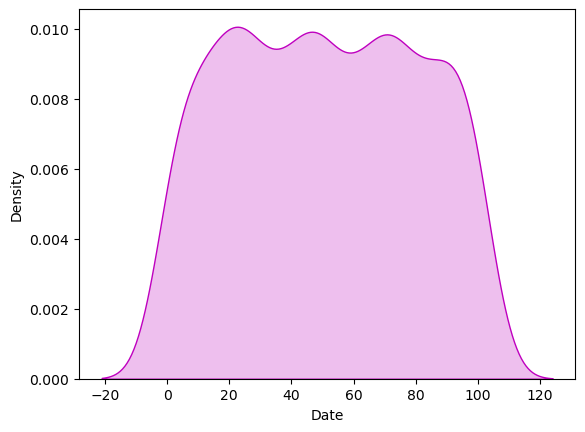

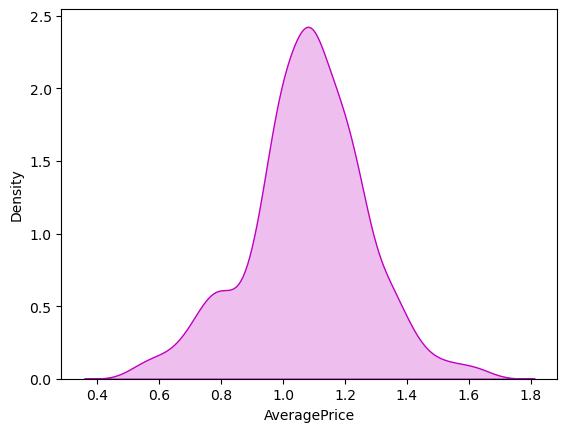

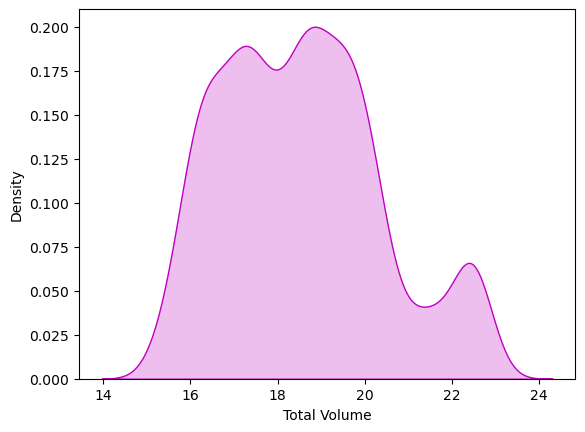

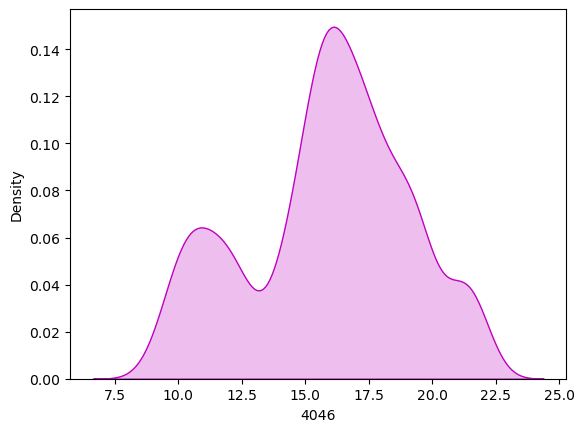

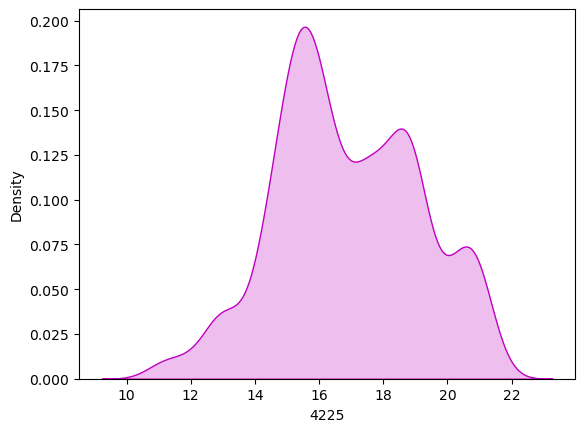

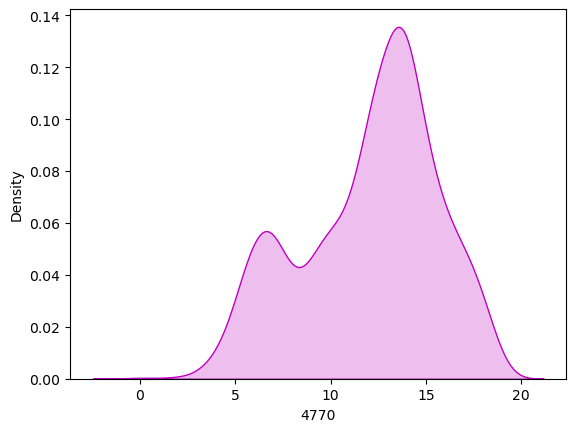

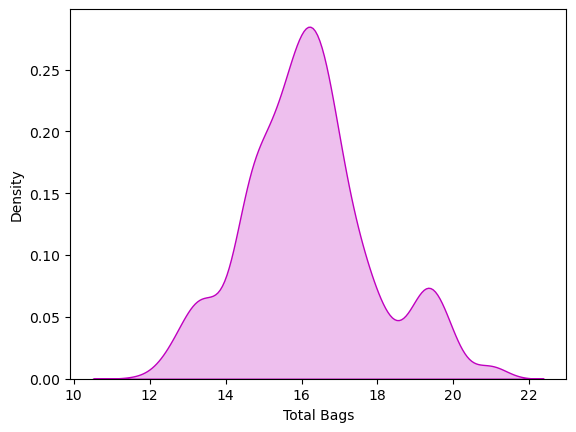

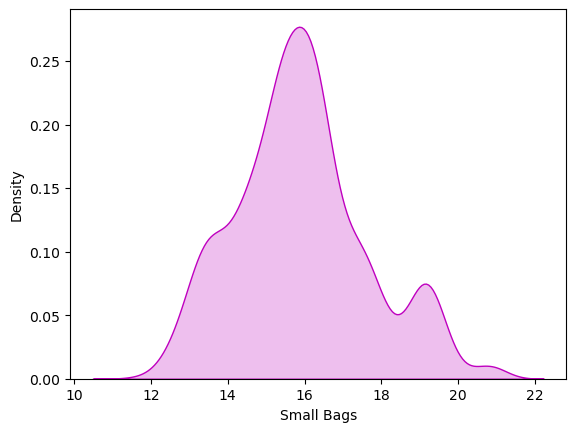

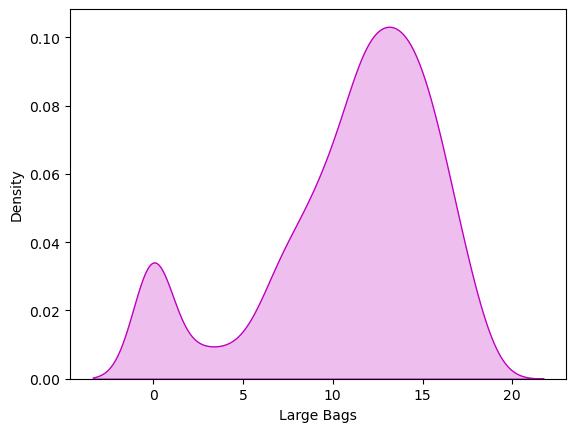

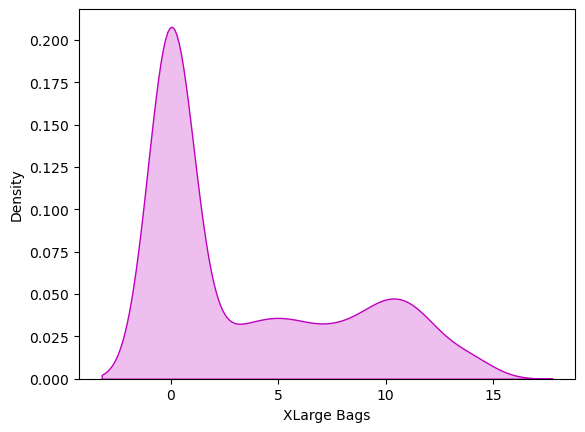

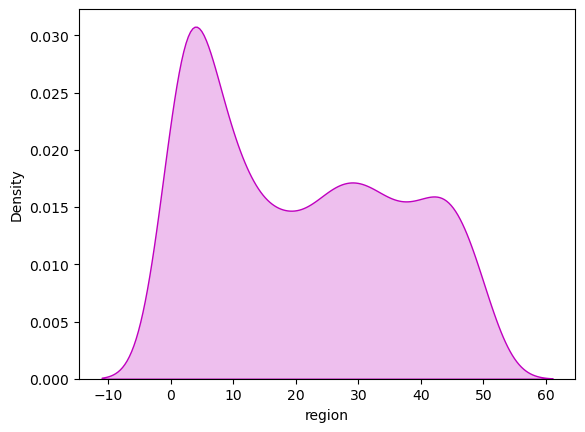

In [48]:
#visualizing the spreading of data
for i in dfav1.columns:
    sns.distplot(dfav1[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

## Corelation:

In [49]:
# corelation between target variable and features
corr=dfav1.corr()
corr

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
Date,1.000000,0.092639,-0.040216,-0.021836,-0.047578,0.004967,-0.017434,-0.006875,-0.028466,0.022988,-0.026685
AveragePrice,0.092639,1.000000,-0.349253,-0.540384,-0.114794,-0.291687,-0.189767,-0.142685,-0.203736,-0.050811,-0.215895
Total Volume,-0.040216,-0.349253,1.000000,0.715444,0.861478,0.563792,0.916182,0.897385,0.524762,0.268347,0.158024
4046,-0.021836,-0.540384,0.715444,1.000000,0.339923,0.513861,0.571182,0.526033,0.457610,0.181686,0.311496
4225,-0.047578,-0.114794,0.861478,0.339923,1.000000,0.464755,0.801890,0.812185,0.370000,0.233392,0.087215
4770,0.004967,-0.291687,0.563792,0.513861,0.464755,1.000000,0.490054,0.507512,0.277639,0.480544,0.009869
Total Bags,-0.017434,-0.189767,0.916182,0.571182,0.801890,0.490054,1.000000,0.979621,0.533463,0.330705,0.118652
Small Bags,-0.006875,-0.142685,0.897385,0.526033,0.812185,0.507512,0.979621,1.000000,0.415115,0.317342,0.104563
Large Bags,-0.028466,-0.203736,0.524762,0.457610,0.370000,0.277639,0.533463,0.415115,1.000000,0.174067,0.043509
XLarge Bags,0.022988,-0.050811,0.268347,0.181686,0.233392,0.480544,0.330705,0.317342,0.174067,1.000000,-0.215819


In [50]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
Date            0.092639
XLarge Bags    -0.050811
4225           -0.114794
Small Bags     -0.142685
Total Bags     -0.189767
Large Bags     -0.203736
region         -0.215895
4770           -0.291687
Total Volume   -0.349253
4046           -0.540384
Name: AveragePrice, dtype: float64

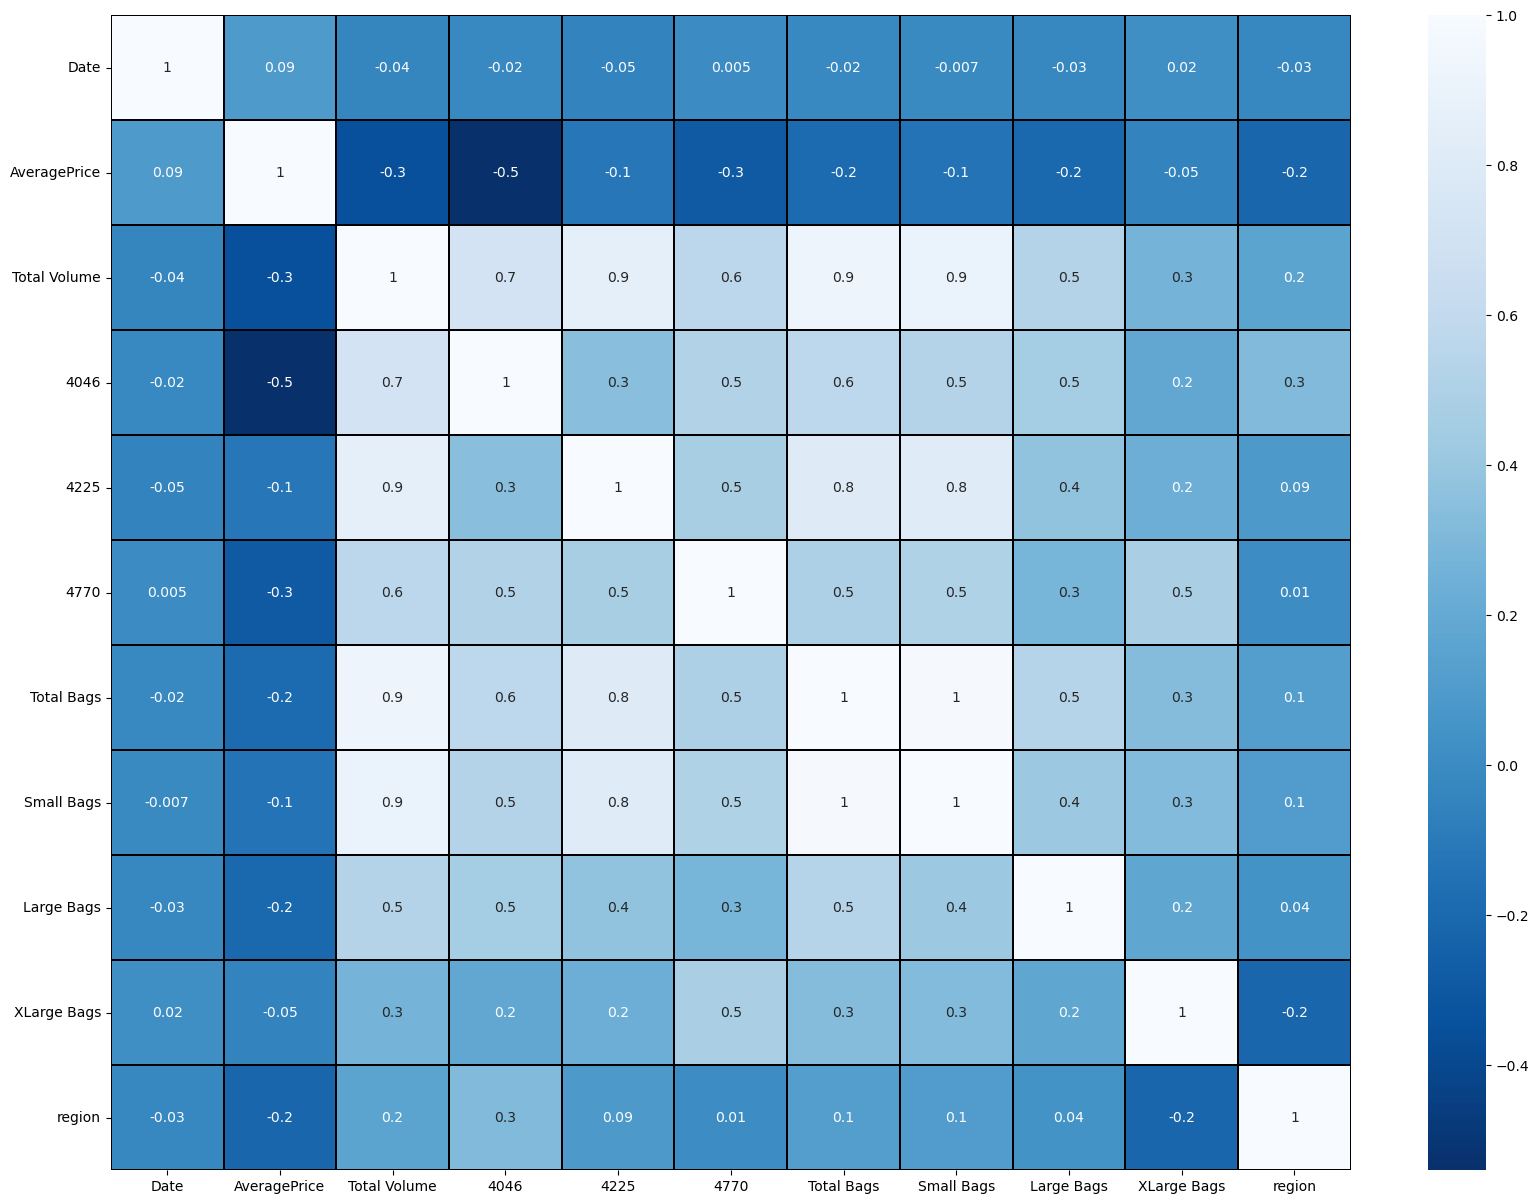

In [51]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(dfav1.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

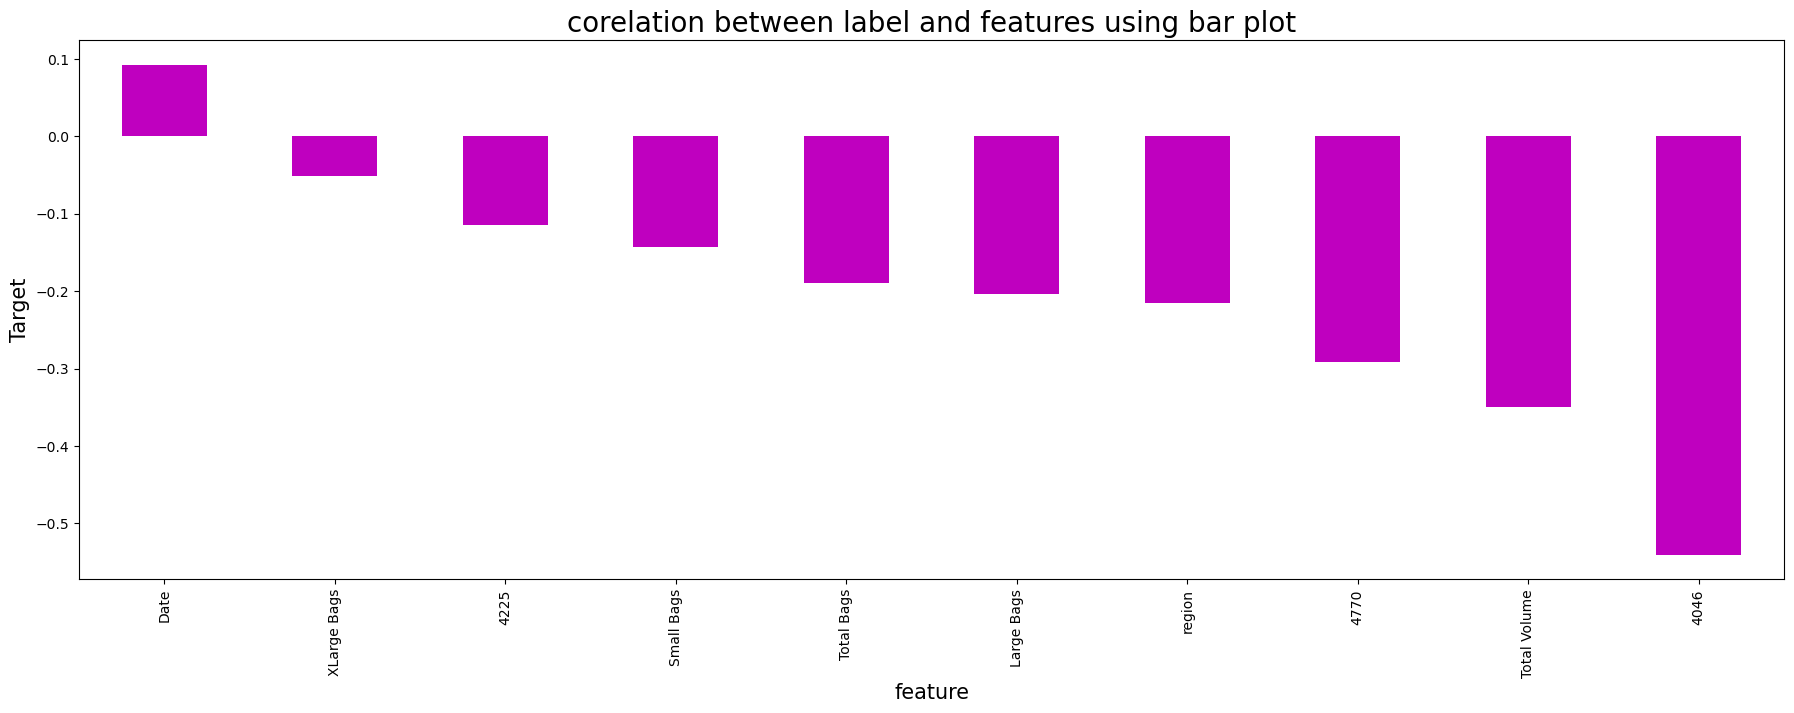

In [52]:
# visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
dfav1.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


In [53]:
dfav1.drop('Small Bags',axis=1,inplace=True)                 # to avoid Multicolinearity

In [54]:
dfav1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

In [55]:
#separating target variable and input variable

x=dfav1.drop('AveragePrice',axis=1)
y=dfav1['AveragePrice']

In [56]:
x

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,region
0,92.0,15.971131,10.019229,15.732799,5.619413,13.086446,6.558421,0.000000,0.0
1,68.0,15.743940,9.399342,15.446043,5.890690,13.214708,6.621905,0.000000,0.0
2,44.0,16.851129,9.636081,16.735961,7.038919,12.991938,6.702381,0.000000,0.0
3,20.0,16.269440,10.145932,16.135257,6.201242,12.504859,7.074249,0.000000,0.0
4,98.0,15.639358,9.880318,15.419940,6.262659,12.594546,7.634375,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
1512,53.0,17.542057,15.812030,15.782580,14.097767,15.858648,13.338130,7.914565,7.0
1513,29.0,17.443435,15.402974,15.671503,14.245298,15.949957,13.069712,0.000000,7.0
1514,5.0,17.444852,15.500772,15.690827,14.030833,15.929646,13.011779,9.689998,7.0
1515,83.0,17.529038,15.723655,15.709799,14.094772,15.964267,13.015286,0.000000,7.0


In [57]:
x.isnull().sum()

Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Large Bags      0
XLarge Bags     0
region          0
dtype: int64

In [58]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,region
0,1.373970,-1.410667,-1.845437,-0.509017,-1.813645,-1.821482,-0.918974,-0.775984,-1.322226
1,0.575407,-1.535293,-2.040669,-0.636296,-1.736871,-1.745993,-0.905743,-0.775984,-1.322226
2,-0.223157,-0.927942,-1.966109,-0.063754,-1.411912,-1.877105,-0.888970,-0.775984,-1.322226
3,-1.021720,-1.247029,-1.805532,-0.330383,-1.648982,-2.163780,-0.811465,-0.775984,-1.322226
4,1.573611,-1.592662,-1.889187,-0.647882,-1.631601,-2.110993,-0.694724,-0.775984,-1.322226
...,...,...,...,...,...,...,...,...,...
1434,0.076305,-0.548933,-0.021003,-0.486921,0.585807,-0.189882,0.494051,0.943742,-0.878606
1435,-0.722259,-0.603032,-0.149834,-0.536224,0.627560,-0.136142,0.438107,-0.775984,-0.878606
1436,-1.520822,-0.602255,-0.119033,-0.527647,0.566864,-0.148096,0.426033,1.329519,-0.878606
1437,1.074509,-0.556074,-0.048836,-0.519226,0.584960,-0.127719,0.426764,-0.775984,-0.878606


In [59]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1439, dtype: float64

##### the output variable contains continues data so we can apply a regression model to the given dataset

# modeling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge


In [61]:
# finding the best random state
maxAcc=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum r2_score is",maxAcc, "on random_state",maxRs)        

maximum r2_score is 0.5000477911652182 on random_state 75


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1007, 9)
(1007,)
(432, 9)
(432,)


In [63]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lr))
print('r2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score: 0.44572573033380314
r2_score on training Data: 33.43431061171167
mean absolute error: 0.1150346915518945
Mean Squared Error:- 0.021537252142132382
Root Mean Squrared Error:- 0.14675575675976865


In [64]:
# Random Forest model:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.7810355076173598
R2_score on training Data: 97.41020897024374
mean absolute error: 0.06494537037037042
Mean Squared Error:- 0.008508230925925932
Root Mean Squrared Error:- 0.0922400722350429


In [65]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.6905929428883231
R2_score on training Data: 78.19187557747745
mean absolute error: 0.08233796296296296
Mean Squared Error:- 0.012022527777777776
Root Mean Squrared Error:- 0.10964728805482503


In [66]:
# GBR
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.7273261590241649
R2_score on training Data: 84.45662616034559
mean absolute error: 0.07576729008457811
Mean Squared Error:- 0.010595197336504505
Root Mean Squrared Error:- 0.1029329749716023


In [67]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: -0.0010503147513021283
R2_score on training Data: 0.0
mean absolute error: 0.1499485775497444
Mean Squared Error:- 0.03889748129341072
Root Mean Squrared Error:- 0.19722444395513128


In [68]:
#Ridge:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('r2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ridge))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

r2_score: 0.44621517768967656
R2_score on training Data: 33.42189067733214
mean absolute error: 0.11483976817795088
Mean Squared Error:- 0.021518233847958104
Root Mean Squrared Error:- 0.14669094671436989


In [69]:
#Decision Tree:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score: 0.5285022226375796
R2_score on training Data: 100.0
mean absolute error: 0.09037037037037036
Mean Squared Error:- 0.018320833333333328
Root Mean Squrared Error:- 0.13535447289740124


In [70]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_svr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score: 0.6871602606665399
R2_score on training Data: 76.02806820451016
mean absolute error: 0.08468727476435564
Mean Squared Error:- 0.012155910376574723
Root Mean Squrared Error:- 0.11025384517818289


###### from above we can see Random Forest model performs better.. now cross validating the models:

In [71]:
# cross validation of the model:
from sklearn.model_selection import cross_val_score

In [72]:
scoreLR=cross_val_score(LR,x,y,cv=5,scoring='r2')             #CROSS VALIDATION FOR LINEAR REGRESSOR
print(scoreLR)
print(scoreLR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lr)-scoreLR.mean())*100)

[-0.55984937 -0.01306283  0.31890599  0.09178623  0.15310365]
-0.001823266453816319
difference between r2 score and cross validation score is: 44.754899678761944


In [73]:
scoreRFR=cross_val_score(RFR,x,y,cv=5,scoring='r2')        #CROSS VALIDATION FOR RANDOM FOREST
print(scoreRFR)
print(scoreRFR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_RFR)-scoreRFR.mean())*100)

[-0.76220956  0.0460604   0.4981023   0.33331677  0.31311192]
0.08567636751895842
difference between r2 score and cross validation score is: 69.53591400984014


In [74]:
scoreknn=cross_val_score(knn,x,y,cv=5,scoring='r2')            # CROSS VALIDATION FOR KNN
print(scoreknn)
print(scoreknn.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_knn)-scoreknn.mean())*100)

[-1.19209728  0.09249601 -0.00497896 -0.35896091  0.30085994]
-0.23253623864600534
difference between r2 score and cross validation score is: 92.31291815343285


In [75]:
scoreGBR=cross_val_score(GBR,x,y,cv=5,scoring='r2')             #cross validation for gbr
print(scoreGBR)
print(scoreGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_GBR)-scoreGBR.mean())*100)

[-0.83357791  0.22947863  0.48432371  0.30581135  0.26069035]
0.08934522596792838
difference between r2 score and cross validation score is: 63.79809330562365


In [76]:
scoreL=cross_val_score(lasso,x,y,cv=5,scoring='r2')            #cross validation for lasso
print(scoreL) 
print(scoreL.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lasso)-scoreL.mean())*100)

[-0.25966532 -0.0871809  -0.01464734 -0.00392758 -0.01087803]
-0.07525983568481558
difference between r2 score and cross validation score is: 7.420952093351345


In [77]:
scoreR=cross_val_score(ridge,x,y,cv=5,scoring='r2')          #cross validation for ridge
print(scoreR)
print(scoreR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_ridge)-scoreR.mean())*100)

[-0.53811541 -0.00780352  0.31670078  0.08042075  0.15375289]
0.0009910984458730177
difference between r2 score and cross validation score is: 44.52240792438035


In [78]:
scoreSVR=cross_val_score(svr,x,y,cv=5,scoring='r2')             #cross validation for svr
print(scoreSVR)
print(scoreSVR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_svr)-scoreSVR.mean())*100)

[-2.37488092  0.45689783  0.02015603 -0.08189561  0.14098935]
-0.3677466644380877
difference between r2 score and cross validation score is: 105.49069251046275


In [79]:
scoreDTR=cross_val_score(dtr,x,y,cv=5,scoring='r2')             #cross validation for svr
print(scoreDTR)
print(scoreDTR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_dtr)-scoreDTR.mean())*100)

[-2.46605636 -0.54632421  0.35869746 -1.5576854  -0.01460757]
-0.84519521663428
difference between r2 score and cross validation score is: 137.36974392718597


# Hyperparameter Tuning Random forest model:

In [80]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
    }

GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=4)
GCV.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]})

In [81]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [82]:
model_av=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=3,min_samples_split= 8,n_estimators=200)

# Final Model

In [83]:
#  Final Model:
model_av.fit(x_train,y_train)
pred=model_av.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

77.15095322052403


### The Final Model giving 77.% accuracy

In [84]:
import joblib
joblib.dump(model_av,"Avocado Average Price")


['Avocado Average Price']

In [85]:
RFRM=joblib.load("Avocado Average Price")
predictionM=RFRM.predict(x_test)
predictionM

array([1.18957268, 0.68334918, 1.00883831, 1.19524681, 1.01308072,
       1.11452645, 1.14866706, 1.06210995, 0.76818243, 1.02443622,
       1.10824684, 1.02584924, 1.14925803, 0.85999191, 1.23441321,
       1.12801213, 1.04848392, 0.87286011, 0.69509231, 1.13780704,
       0.64817573, 1.00935191, 1.32685763, 1.05972421, 0.59453299,
       1.08319242, 1.23844689, 0.93022684, 1.2543233 , 1.01888543,
       1.20903489, 1.09441508, 1.17996659, 1.08249289, 0.81936   ,
       0.6004145 , 1.08805072, 0.78735328, 1.05056164, 1.2819925 ,
       0.86925885, 1.16964278, 1.26161201, 1.22064718, 1.13052564,
       1.04583239, 1.06128337, 1.09125428, 1.02775537, 0.99981507,
       1.15237195, 1.03768113, 1.29254214, 1.13381365, 1.17146023,
       1.04927617, 1.18421543, 0.7007144 , 1.1341608 , 1.22137901,
       1.05997628, 1.36440982, 1.17514142, 0.98832915, 1.01840915,
       0.77903412, 0.81951991, 1.01218663, 0.99149342, 1.16167812,
       1.08128378, 1.06473279, 1.20592327, 0.83222199, 1.11058

In [86]:
a=np.array(y_test)
DFM=pd.DataFrame()
DFM['predicted']=predictionM
DFM['original']=a
DFM

,predicted,original
0,1.189573,1.06
1,0.683349,0.66
2,1.008838,0.92
3,1.195247,1.27
4,1.013081,0.97
...,...,...
427,0.899328,0.81
428,1.031112,0.96
429,1.030136,0.97
430,1.099120,1.05


### PHASE-2: REGION ANALYSIS

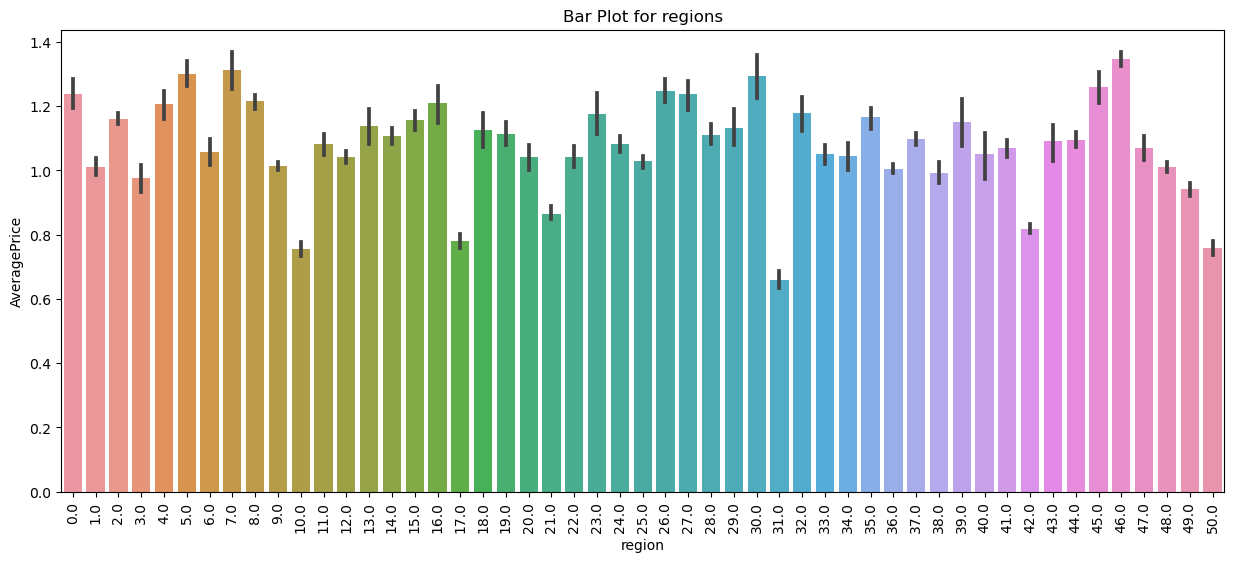

In [87]:
#BiVariate Analysis:
plt.figure(figsize=(15,6))
sns.barplot(x=dfav['region'],y=dfav['AveragePrice'], data=dfav)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

In [88]:
dfav2=dfav1.copy()
dfav2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,region
0,92.0,1.33,15.971131,10.019229,15.732799,5.619413,13.086446,6.558421,0.000000,0.0
1,68.0,1.35,15.743940,9.399342,15.446043,5.890690,13.214708,6.621905,0.000000,0.0
2,44.0,0.93,16.851129,9.636081,16.735961,7.038919,12.991938,6.702381,0.000000,0.0
3,20.0,1.08,16.269440,10.145932,16.135257,6.201242,12.504859,7.074249,0.000000,0.0
4,98.0,1.28,15.639358,9.880318,15.419940,6.262659,12.594546,7.634375,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
1512,53.0,1.39,17.542057,15.812030,15.782580,14.097767,15.858648,13.338130,7.914565,7.0
1513,29.0,1.51,17.443435,15.402974,15.671503,14.245298,15.949957,13.069712,0.000000,7.0
1514,5.0,1.48,17.444852,15.500772,15.690827,14.030833,15.929646,13.011779,9.689998,7.0
1515,83.0,1.47,17.529038,15.723655,15.709799,14.094772,15.964267,13.015286,0.000000,7.0


In [89]:
#separating target variable and input variable

x=dfav1.drop('region',axis=1)
y=dfav1['region']

In [90]:
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags
0,92.0,1.33,15.971131,10.019229,15.732799,5.619413,13.086446,6.558421,0.000000
1,68.0,1.35,15.743940,9.399342,15.446043,5.890690,13.214708,6.621905,0.000000
2,44.0,0.93,16.851129,9.636081,16.735961,7.038919,12.991938,6.702381,0.000000
3,20.0,1.08,16.269440,10.145932,16.135257,6.201242,12.504859,7.074249,0.000000
4,98.0,1.28,15.639358,9.880318,15.419940,6.262659,12.594546,7.634375,0.000000
...,...,...,...,...,...,...,...,...,...
1512,53.0,1.39,17.542057,15.812030,15.782580,14.097767,15.858648,13.338130,7.914565
1513,29.0,1.51,17.443435,15.402974,15.671503,14.245298,15.949957,13.069712,0.000000
1514,5.0,1.48,17.444852,15.500772,15.690827,14.030833,15.929646,13.011779,9.689998
1515,83.0,1.47,17.529038,15.723655,15.709799,14.094772,15.964267,13.015286,0.000000


In [91]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Large Bags,XLarge Bags
0,1.373970,1.330513,-1.410667,-1.845437,-0.509017,-1.813645,-1.821482,-0.918974,-0.775984
1,0.575407,1.435940,-1.535293,-2.040669,-0.636296,-1.736871,-1.745993,-0.905743,-0.775984
2,-0.223157,-0.778028,-0.927942,-1.966109,-0.063754,-1.411912,-1.877105,-0.888970,-0.775984
3,-1.021720,0.012675,-1.247029,-1.805532,-0.330383,-1.648982,-2.163780,-0.811465,-0.775984
4,1.573611,1.066946,-1.592662,-1.889187,-0.647882,-1.631601,-2.110993,-0.694724,-0.775984
...,...,...,...,...,...,...,...,...,...
1434,0.076305,1.646794,-0.548933,-0.021003,-0.486921,0.585807,-0.189882,0.494051,0.943742
1435,-0.722259,2.279357,-0.603032,-0.149834,-0.536224,0.627560,-0.136142,0.438107,-0.775984
1436,-1.520822,2.121216,-0.602255,-0.119033,-0.527647,0.566864,-0.148096,0.426033,1.329519
1437,1.074509,2.068503,-0.556074,-0.048836,-0.519226,0.584960,-0.127719,0.426764,-0.775984


In [92]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1512    7.0
1513    7.0
1514    7.0
1515    7.0
1516    7.0
Name: region, Length: 1439, dtype: float64

In [93]:
y.nunique()

50

In [94]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [95]:
# to balance the target variable data over sampling is performed:
from imblearn.over_sampling import SMOTE
sm=SMOTE(k_neighbors=2)
x1,y1=sm.fit_resample(x,y)

In [96]:
y1.value_counts()

0.0     67
37.0    67
27.0    67
28.0    67
29.0    67
30.0    67
31.0    67
32.0    67
33.0    67
34.0    67
35.0    67
36.0    67
38.0    67
1.0     67
39.0    67
40.0    67
41.0    67
42.0    67
43.0    67
44.0    67
45.0    67
46.0    67
47.0    67
49.0    67
26.0    67
25.0    67
24.0    67
23.0    67
2.0     67
3.0     67
4.0     67
5.0     67
6.0     67
7.0     67
8.0     67
9.0     67
10.0    67
11.0    67
12.0    67
13.0    67
14.0    67
15.0    67
16.0    67
17.0    67
18.0    67
19.0    67
20.0    67
21.0    67
22.0    67
50.0    67
Name: region, dtype: int64

#### Applying Classification Model for Region analysis:

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [98]:
# creating train test split:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum acc_score is",maxAcc, "on random_state",maxRs)        

maximum acc_score is 0.9950248756218906 on random_state 2


In [99]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=75)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2512, 9)
(2512,)
(838, 9)
(838,)


In [100]:
#Logistic regression model:
logR=LogisticRegression()
logR.fit(x_train,y_train)
pred_train=logR.predict(x_train)
pred_Lgr=logR.predict(x_test)
print("predicted accuracy",accuracy_score(y_test,pred_Lgr))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_Lgr))
print(classification_report(y_test,pred_Lgr))


predicted accuracy 0.9439140811455847
accuracy score of original y_test data 0.9570063694267515
[[11  0  0 ...  0  0  0]
 [ 0 15  0 ...  2  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  1  0 ... 12  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 19]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.65      0.83      0.73        18
         2.0       1.00      0.92      0.96        12
         3.0       1.00      0.95      0.98        22
         4.0       0.76      1.00      0.87        13
         5.0       1.00      0.92      0.96        12
         6.0       1.00      0.94      0.97        18
         7.0       1.00      0.60      0.75        15
         8.0       1.00      1.00      1.00        21
         9.0       0.95      1.00      0.97        19
        10.0       0.88      0.96      0.92        23
        11.0       1.00      1.00      1.00        21
        12.0       1.00      1.00      1.00  

In [101]:
#GradientBoosting
GBR=GradientBoostingClassifier()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(accuracy_score(y_test,pred_GBR))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_GBR))
#print(classification_report(y_test,pred_GBR))


0.9582338902147971
accuracy score of original y_test data 1.0
[[ 9  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  1  0 ... 14  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 17]]


In [102]:
#DecissionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
#print(classification_report(y_test,pred_dtc))

accuracy score of original y_test data 1.0
0.9439140811455847
[[11  0  0 ...  0  0  0]
 [ 0 14  0 ...  4  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 17]]


In [103]:
#RandomForestClassifier:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
#print(classification_report(y_test,pred_RFC))


0.9880668257756563
[[11  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 18]]


In [104]:
#AdaBoostClassifier:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
#print(classification_report(y_test,pred_ABC))

0.07637231503579953
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]]


## CROSS VALIDATING THE MODEL:

In [105]:
score_LR=cross_val_score(logR,x1,y1)                     # Logistic Regression
print(score_LR)
print(score_LR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_Lgr)-(score_LR.mean()))

[0.90447761 0.92985075 0.9358209  0.93432836 0.94776119]
0.9304477611940298
diff b/w accuracy score and cross validation score is: 0.013466319951554895


In [106]:
score_GBR=cross_val_score(GBR,x1,y1)                           #GBC
print(score_GBR)
print(score_GBR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_GBR)-(score_GBR.mean()))

[0.9        0.93731343 0.9641791  0.98059701 0.9880597 ]
0.9540298507462687
diff b/w accuracy score and cross validation score is: 0.004204039468528431


In [107]:
score_dtc=cross_val_score(dtc,x1,y1)               # Decission tree cassifier
print(score_dtc)
print(score_dtc.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_dtc)-(score_dtc.mean()))

[0.91044776 0.92985075 0.95373134 0.95671642 0.98059701]
0.9462686567164178
diff b/w accuracy score and cross validation score is: -0.002354575570833073


In [108]:
score_RFC=cross_val_score(RFC,x1,y1)                      #Random forest classifier
print(score_RFC)
print(score_RFC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_RFC)-(score_RFC.mean()))

[0.96716418 0.98955224 0.98208955 0.99253731 0.99850746]
0.9859701492537314
diff b/w accuracy score and cross validation score is: 0.0020966765219249117


In [109]:
score_ABC=cross_val_score(ABC,x1,y1)                 #Adaboost classifier
print(score_ABC)
print(score_ABC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_ABC)-(score_ABC.mean()))

[0.05522388 0.10746269 0.0880597  0.09253731 0.10746269]
0.09014925373134329
diff b/w accuracy score and cross validation score is: -0.013776938695543764


##### From varifying cross validation score and accuracy score we can conclude that RandomForest Classifier gives best result for analysing region

## Hyperparameter Tuning For Randomforest Classifier

In [110]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
    }

GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=4)
GCV.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]})

In [111]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [125]:
model_region=RandomForestClassifier(bootstrap=True,max_depth=80,max_features=2,min_samples_leaf=3,min_samples_split= 8,n_estimators=300)

# Final Model

In [126]:
model_region.fit(x_train,y_train)
pred=model_region.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

94.3413569050992


### The Final Model giving 94.35%  accuracy

In [127]:
import joblib
joblib.dump(model_region,"Avocado Region Prediction")


['Avocado Region Prediction']

In [128]:
RFCM=joblib.load("Avocado Region Prediction")
predictionM=RFCM.predict(x_test)
predictionM

array([45., 12., 40., 15.,  4., 19., 38.,  0., 31., 11., 28., 36., 46.,
       36., 38., 44., 45., 18., 34.,  0., 32., 26., 45.,  1., 23., 28.,
        6., 43., 10., 41., 29., 30., 19., 39.,  9., 50., 10., 10., 33.,
        9.,  4., 25.,  8., 42., 14., 17., 37., 32., 18., 44., 41., 20.,
       18., 11., 18., 11., 31., 14., 18., 43., 26., 16., 28., 50., 13.,
       25.,  9., 47., 39., 19., 40., 38., 35.,  8., 39., 20.,  8., 45.,
       11.,  2., 29., 44., 43., 11., 24.,  8., 42., 35., 16., 33., 41.,
       19., 27., 12.,  8., 23., 17., 34., 46., 32., 30., 16., 19., 37.,
       49., 43.,  5., 10., 41.,  2., 42., 11., 11., 13., 33., 41.,  4.,
       21., 44.,  5., 20., 18., 37.,  1., 39.,  5., 28.,  5., 33., 12.,
       13., 35.,  3.,  0., 42.,  8., 49., 32., 23., 21., 47., 50., 20.,
       40., 20., 21., 29., 36.,  3., 14., 44., 14., 35., 26., 40.,  4.,
       12., 27., 22., 28., 28., 23., 41., 35.,  0., 10., 39., 25., 31.,
       42., 30.,  2., 15., 38.,  7., 39., 28., 13., 16., 17., 30

In [129]:
a=np.array(y_test)
DF_REGION=pd.DataFrame()
DF_REGION['predicted']=predictionM
DF_REGION['original']=a
DF_REGION

,predicted,original
0,45.0,45.0
1,12.0,12.0
2,40.0,40.0
3,15.0,15.0
4,4.0,4.0
...,...,...
833,8.0,8.0
834,29.0,29.0
835,26.0,26.0
836,23.0,23.0
